In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
file = "combinedFilters_csv.csv"
filt_df = pd.read_csv(file, delimiter=',')
filt_df.shape

(1295116, 74)

In [3]:
filt_df.head()

,ESN,AVL,Vehículo,Fecha Servidor,Fecha AVL,RPM,Pedal,F. de Carga,Potencia,Estado Motor,...,Engine Operating State (bit),Engine Turbocharger 1 Compressor Inlet Pressure (kPa),Engine Protection System has Shutdown Engine (bit),Engine Protection System Approaching Shutdown (bit),Engine Protection System Timer State (bit),Engine Oil Filter Differential Pressure (Extended Range) (PSI),Engine Oil Priming Pump Control (bit),Engine Controlled Shutdown Request (bit),Engine Emergency (Immediate) Shutdown Indication (bit),Power (HP)
0,66304315,7194,CA-161,2018-05-31 12:02:09,2018-05-31 11:59:49,1909.63,100.0,100.0,3327.87,Transicion,...,15.0,0.0,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3327.87
1,66304315,7194,CA-161,2018-05-31 12:26:17,2018-05-31 12:24:04,1901.88,100.0,100.0,3314.37,Transicion,...,15.0,0.0,0.0,3.0,3.0,4.35,3.0,0.0,0.0,3314.37
2,66304315,7194,CA-161,2018-05-31 12:26:52,2018-05-31 12:24:49,1906.88,100.0,100.0,3323.08,Potencia,...,15.0,0.0,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3323.08
3,66304315,7194,CA-161,2018-05-31 12:28:07,2018-05-31 12:25:34,1918.00,100.0,100.0,3271.34,Potencia,...,15.0,0.0,0.0,3.0,3.0,2.18,3.0,0.0,0.0,3271.34
4,66304315,7194,CA-161,2018-05-31 12:52:18,2018-05-31 12:46:14,1906.25,100.0,100.0,3321.98,Transicion,...,15.0,0.0,0.0,3.0,3.0,2.90,3.0,0.0,0.0,3321.98


In [4]:
filt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295116 entries, 0 to 1295115
Data columns (total 74 columns):
 #   Column                                                          Non-Null Count    Dtype  
---  ------                                                          --------------    -----  
 0   ESN                                                             1295116 non-null  int64  
 1   AVL                                                             1295116 non-null  int64  
 2   Vehículo                                                        1295116 non-null  object 
 3   Fecha Servidor                                                  1295116 non-null  object 
 4   Fecha AVL                                                       1295116 non-null  object 
 5   RPM                                                             1295116 non-null  float64
 6   Pedal                                                           1295116 non-null  float64
 7   F. de Carga                

In [5]:
filt_df["Vehículo"].unique()

array(['CA-161', 'CA-116', 'CA-64', 'CA-57', 'CA-129', 'CA-155', 'CA-150',
       'CA-94', 'CA-130', 'CA-126', 'CA-87', 'CA-119', 'CA-117', 'CA-88',
       'CA-97'], dtype=object)

In [6]:
filt_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ESN,1295116.0,6.630267e+07,1400.005351,66300987.00,66301308.00,66302417.00,66304318.00,66304554.00
AVL,1295116.0,7.152224e+03,89.909166,7001.00,7138.00,7152.00,7177.00,102133.00
RPM,1295116.0,1.901239e+03,9.153357,1865.25,1896.25,1901.38,1906.25,1978.38
Pedal,1295116.0,9.951305e+01,0.485696,95.20,99.20,99.20,100.00,100.00
F. de Carga,1295116.0,9.999038e+01,0.115289,98.00,100.00,100.00,100.00,100.00
...,...,...,...,...,...,...,...,...
Engine Oil Filter Differential Pressure (Extended Range) (PSI),1254646.0,3.668100e+00,2.322823,0.00,2.18,3.63,5.08,15.95
Engine Oil Priming Pump Control (bit),1261217.0,3.000000e+00,0.000000,3.00,3.00,3.00,3.00,3.00
Engine Controlled Shutdown Request (bit),1261217.0,0.000000e+00,0.000000,0.00,0.00,0.00,0.00,0.00
Engine Emergency (Immediate) Shutdown Indication (bit),1261217.0,0.000000e+00,0.000000,0.00,0.00,0.00,0.00,0.00


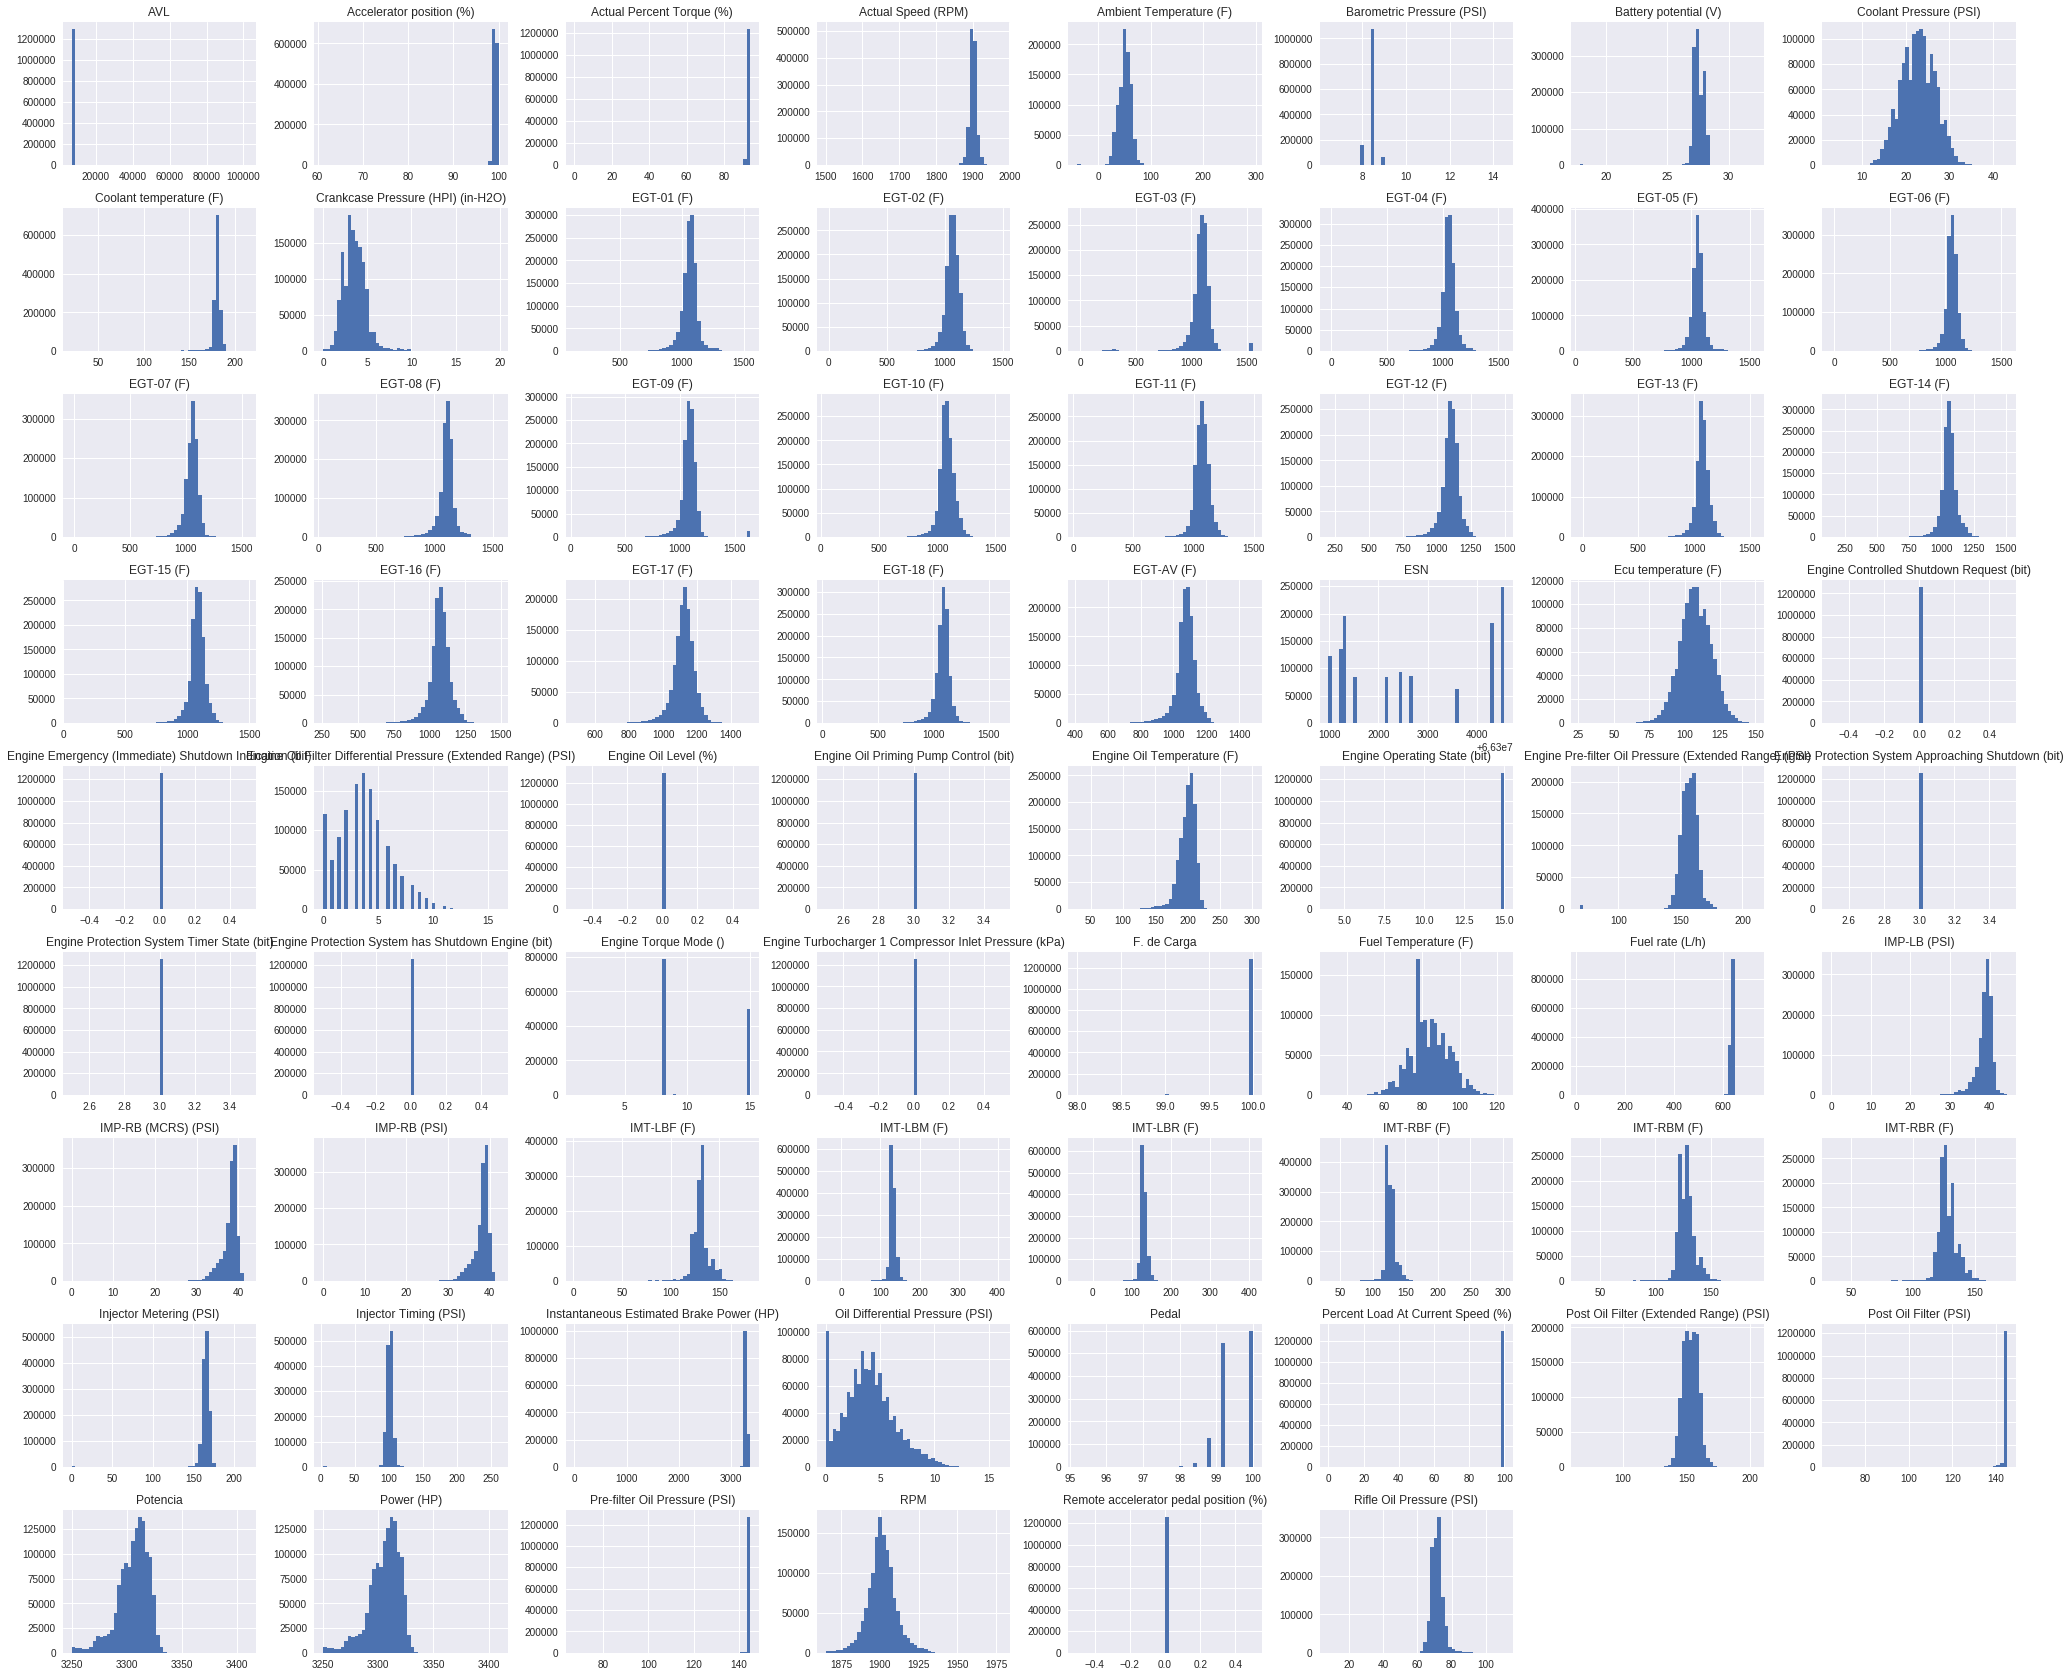

9.717378854751587

In [7]:
start = time.time()
filt_df.hist(bins=50, figsize=(35,30))
plt.show()
end = time.time()
end - start